In [1]:
import numpy as np
import pandas as pd
import os
from scipy import stats

# 乱数を固定する
import random
np.random.seed(1234)
random.seed(1234)

# データを可視化する
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# データ入力
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')
sample = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv')
data = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv')

# 全データ結合
# all_df = pd.concat([train, test],sort=False).reset_index(drop=True)

In [3]:
feat = 'efs_time'
# train[feat].describe()
data.loc[58,'description']
# train[['ID',feat]].groupby(feat).count()
# data.loc[58]

'Time to event-free survival, months'

In [4]:
data.tail()

,variable,description,type,values
54,hla_match_drb1_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
55,pulm_moderate,"Pulmonary, moderate",Categorical,['Yes' 'Not done' 'No' nan]
56,hla_low_res_10,NaN,Numerical,NaN
57,efs,Event-free survival,Categorical,['Event' 'Censoring']
58,efs_time,"Time to event-free survival, months",Numerical,NaN


In [5]:
test.shape

(3, 58)

<Axes: xlabel='dri_score'>

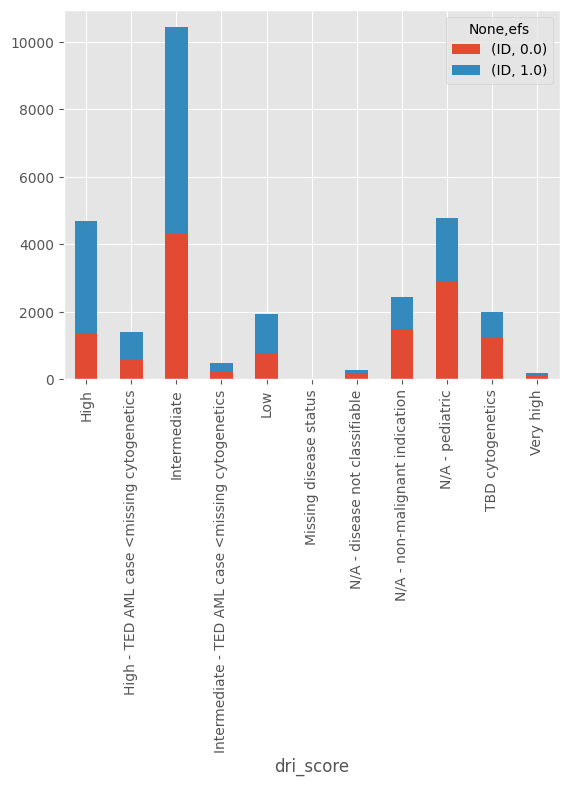

In [6]:
# graph = train[['vent_hist','efs']].dropna().groupby('vent_hist').count()
graph = train[['ID','dri_score','efs']].dropna().groupby(['dri_score','efs']).count().unstack()
graph.plot.bar(stacked=True)

In [7]:
sample['prediction']

0    0.5
1    0.5
2    0.5
Name: prediction, dtype: float64

In [8]:
sample.to_csv('/kaggle/working/submission.csv', index = False)